In [1]:
# Deep Learning with Python 3.4: Classifying movie reviews

from keras.datasets import imdb

from keras import preprocessing

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

len(train_data)

Using TensorFlow backend.


25000

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index() # word_index is a dictionary mapping words to an integer index.
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # Reverses it, mapping integer indices to words.
decoded_review = ' '.join(
    [reverse_word_index.get(i -3, '?') for i in train_data[0]]) # Decodes the review. 
                                                                # NB. the indices are offset by 3 because 
                                                                # 0,1,2 are reserved indices for 
                                                                # "padding", "start of sequence", "unknown". 

In [6]:
# 3.4.2: Preparing the data

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] =1.
    return results

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [7]:
# 6.6: Loading IMDB data for use with an Embedding layer

from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # Number of words to consider as FEATURES.
maxlen = 20 # Cuts off the text after this number of words (among the max_features most common words).

(x_train, y_train), (x_test, y_test) = imdb.load_data( 
    num_words=max_features) # Loads data as lists of integers (x_train is a list of 25000 documents, 
                                                              # y_train is a list of pos-neg ratings for each document)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [8]:
# 6.7 Using an Embedding layer and classifier on IMDB

from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) # Specifies the maximum input length to the Embedding layer so 
                                                    # you can later flatten the embedded inputs. After the Embedding 
                                                    # layer, the activations have shape (samples, maxlen, 8).

model.add(Flatten()) # Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen * 8). 


model.add(Dense(1, activation='sigmoid')) # Adds the classifier on top
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                  epochs=10,
                  batch_size=32,
                  validation_split=0.2)    

# Note that merely flattening the embedded sequences 
# and training a single Dense layer on top leads to 
# a model that treats each word in the input sequence separetely
# without considering inter-word relationships and sentence structure
# e.g. this model would likely treat both "this movis is a bomb" and
# "this movie is the bomb" as being negative reviews. 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 75us/step - loss: 0.6759 - acc: 0.6045 - val_loss: 0.6398 - val_acc: 0.6802
Epoch 2/10
20000/20000 [==============================] - 2s 84us/step - loss: 0.5658 - acc: 0.7426 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 74us/step - loss: 

In [31]:
# 6.8: Processing the labels of the raw IMDB data

import os
imdb_dir = '/Users/sofia/comp150_project1/data/data1'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['female', 'male']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'male':
                labels.append(0)
            else:
                labels.append(1)

In [32]:
# 6.9: Tokenizing the text of the raw IMDB data

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # Cuts off reviews after 100 words.
training_samples = 200 # Trains on 200 samples. 
validation_samples = 10000 # Validates on 10,000 samples. 
max_words = 10000 # Considers only the top 10,000 words in the dataset. 

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices] # Splits the data into a training set and a validation set, but first shuffles the data, 
                         # because you’re starting with data in which samples are ordered (all negative first, 
                         # then all positive). 
        
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples] 
y_val = labels[training_samples: training_samples + validation_samples]

Found 6745 unique tokens.
Shape of data tensor: (2050, 100)
Shape of label tensor: (2050,)


In [33]:
# 6.10: Parsing the GloVe word embedding

glove_dir = '/Users/sofia/corpora_2018_fall/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [34]:
# 6.11: Preparing GloVe embedding matrix

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # Words not found in the embedding index will be all zeros.

# 6.12: Model def

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 6.13: Loading pretrained word embeddings into the Embedding layer

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [39]:
# 6.14: Training and evaluation

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

model.summary()

Train on 200 samples, validate on 1850 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1122 - acc: 0.9750 - val_loss: 0.9666 - val_acc: 0.5038
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0789 - acc: 0.9750 - val_loss: 0.7685 - val_acc: 0.5168
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0444 - acc: 0.9950 - val_loss: 0.7849 - val_acc: 0.5200
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0358 - acc: 0.9950 - val_loss: 0.8034 - val_acc: 0.5184
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0255 - acc: 1.0000 - val_loss: 0.8219 - val_acc: 0.5200
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0205 - acc: 1.0000 - val_loss: 1.2751 - val_acc: 0.4984
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0203 - acc: 1.0000 - val_loss: 0.9160 - val_acc: 0.5173
Epoch 8/10
200/200 [=========

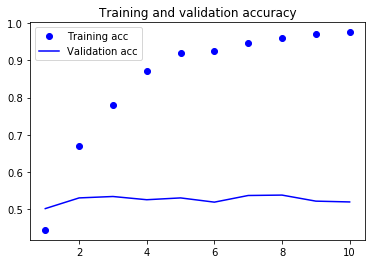

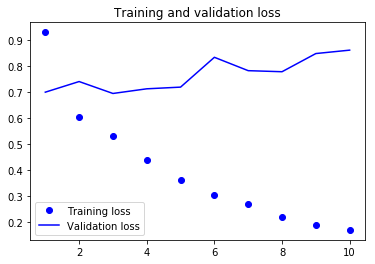

In [37]:
# 6.15: Plotting the results

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [38]:
# 6.16: Training the same model without pretrained word embeddings

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 1850 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 0.6989 - acc: 0.4950 - val_loss: 0.7049 - val_acc: 0.5049
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.6791 - ac

In [28]:
# 6.17: Tokenizing the data of the test set

test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [29]:
# 6.18: Evaluating the model on the test set

model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 63us/step


[0.765313526649475, 0.56728]